In [16]:
!pip install -U datasets
!pip install wordcloud
!pip install -U transformers

In [17]:
from datasets import load_dataset

In [18]:
dataset = load_dataset("EdinburghNLP/xsum")

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
train = dataset['train'].select(range(1000))
df= train['document']
train_df = dataset["train"].to_pandas()
print(train_df.isnull().sum())

document    0
summary     0
id          0
dtype: int64


In [21]:
duplicate_rows = train_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [22]:
comment_words = ''
stopwords = set(STOPWORDS)

In [23]:
j = 0
for val in df:
    j=j+ 1

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

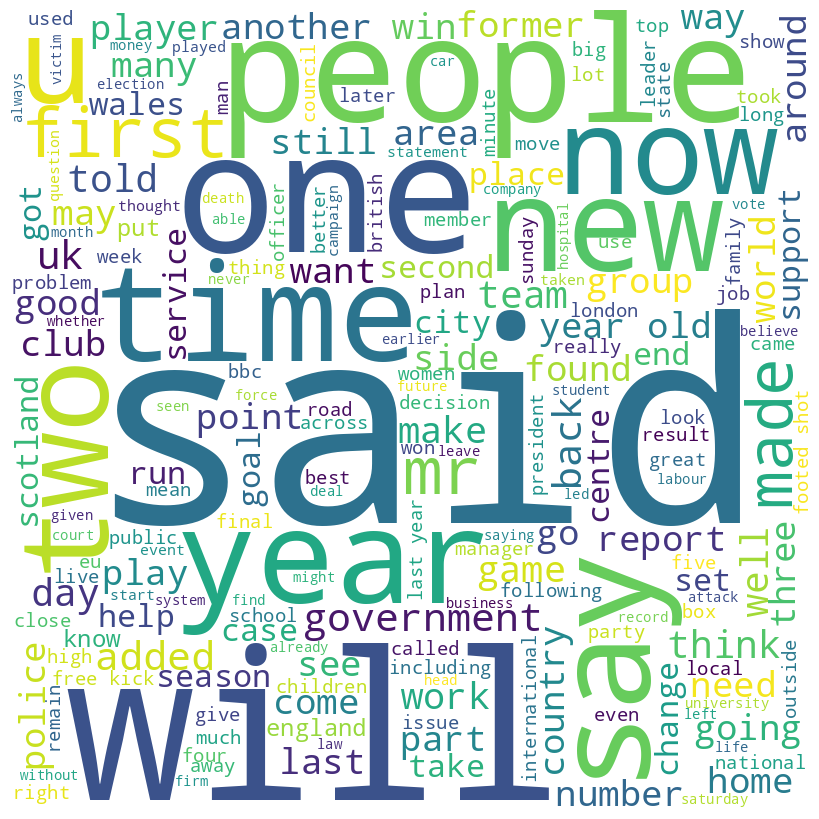

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('word_cloud1.png')

In [26]:
data = dataset['train']
doc_lengths = [len(doc.split()) for doc in data["document"]]
sum_lengths = [len(summary.split()) for summary in data["summary"]]

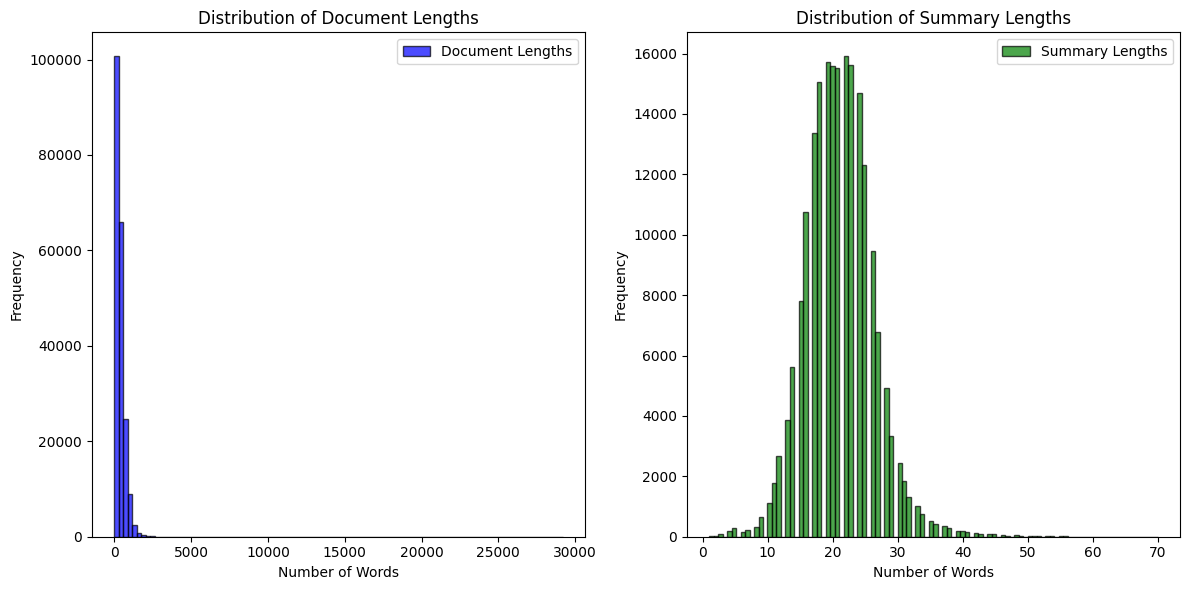

In [27]:
plt.figure(figsize=(12, 6))

# Document lengths
plt.subplot(1, 2, 1)
plt.hist(doc_lengths, bins=100, color="blue", alpha=0.7, label="Document Lengths", edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Document Lengths")
plt.legend()

# Summary lengths
plt.subplot(1, 2, 2)
plt.hist(sum_lengths, bins=100, color="green", alpha=0.7, label="Summary Lengths", edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Summary Lengths")
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
from datasets import DatasetDict

In [ ]:
from datasets import load_dataset

new_dataset = DatasetDict({
    "train": dataset['train'].shuffle(seed = 42).select(range(30000)),
    "validation": dataset['validation'].shuffle(seed = 43).select(range(2000)),
    "test":dataset['test'].shuffle(seed = 43).select(range(2000)),
})

In [ ]:

new_dataset

In [15]:

def preprocess_function(data):
    inputs = tokenizer(
        data["document"],
        max_length=4096,
        truncation=True,
        padding="max_length"
    )
    targets = tokenizer(
        data["summary"],
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

In [ ]:
from transformers import LEDTokenizer, LEDForConditionalGeneration, Trainer, TrainingArguments
tokenizer = LEDTokenizer.from_pretrained("allenai/led-base-16384")
model = LEDForConditionalGeneration.from_pretrained("allenai/led-base-16384")

In [30]:
tokenized_dataset = new_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [32]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})

In [34]:
from transformers import AutoTokenizer,T5ForConditionalGeneration

checkpoint = "google-t5/t5-small"
model1 = T5ForConditionalGeneration.from_pretrained(checkpoint)
tokenizer1 = AutoTokenizer.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [35]:
tokenized_datasetT5 = new_dataset.map(preprocess_function, batched=True)

In [36]:
tokenized_datasetT5

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2000
    })
})